In [8]:
%matplotlib inline

import sys
sys.path.append('../')

In [9]:
from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_kmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_kmeans))
run_ids_kmeans = get_run_ids(runs_kmeans)

10


In [10]:
runs_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans", 30, 0.01, 10])
print(len(runs_wkmeans))
run_ids_wkmeans = get_run_ids(runs_wkmeans)

10


In [11]:
samples_labeled_kmeans, avg_accs_kmeans = get_labeledSamples_avgAcc(run_ids_kmeans, tracking)
samples_labeled_wkmeans, avg_accs_wkmeans = get_labeledSamples_avgAcc(run_ids_wkmeans, tracking)

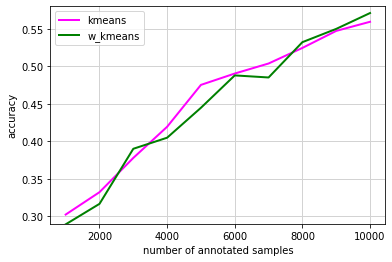

In [12]:
# plot
plt.plot(samples_labeled_kmeans, avg_accs_kmeans,color='magenta', label='kmeans', linewidth=2)
plt.plot(samples_labeled_wkmeans, avg_accs_wkmeans,color='green', label='w_kmeans', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [13]:
avg_accs_kmeans

array([0.30232, 0.33218, 0.37787, 0.41941, 0.47527, 0.49041, 0.50379,
       0.52457, 0.54727, 0.55944])

In [14]:
avg_accs_wkmeans

array([0.28926, 0.31661, 0.39005, 0.40483, 0.44475, 0.48791, 0.48515,
       0.53225, 0.54995, 0.57108])